## Table of Contents

1. [Problem Statement](#section1)
2. [Data Description](#section2)
3. [Choosing the Tool of Analysis](#section3)
4. [Data Collection](#section4)
    -  4.1 [Importing the modules & setting the analysis environment](#section4.1)
    -  4.2 [Loading the dataset using Pandas DataFrame](#section4.2)
    -  4.3 [Pre-reading the dataset](#section4.3)
5. [Pre-profiling the Dataset](#section5)
6. [Pre-processing the Dataset](#section6)
    -  6.1 [Assumptions](#section6.1)
    -  6.2 [Check the fields with null values](#section6.2)
    -  6.3 [Assumption Verification Methods](#section6.3)
    -  6.4 [Fill in the null values & verify the assumptions](#section6.4)
    -  6.5 [Dropping the columns which are not required](#section6.5)
    -  6.6 [Adding new fields](#section6.6)
7. [Post-profiling the Dataset](#section7)
8. [Data Normalisation](#section8)
    -  8.1 [Creating Sub DataFrames](#section8.1)
9. [Exploratory Data Analysis](#section9)
    -  9.1 [Univariate](#section9.1)
    -  9.2 [Bivariate](#section9.2)
    -  9.3 [Multiivariate](#section9.3)
10. [Conclusion](#section10)
11. [Actionable Insights](#section11)

<a id='section1'></a>
### 1. Problem Statement


> I am an entrepreuner and am starting a Financial Advisory business to the HNI clients who are willing to invest in both open market and private equity. Currently, my focus is on the companies in the Entertainment industry and am trying to identify what makes them go long.

> The primary objective of this EDA exercise is to identify the factors which have been the reasons for success of movies in the past.

> I have a dataset of 1000 movies from the Internet Movie Database website (a subsidiary of Amazon) which has the details of different aspects of a movie (E.g. Year of Release, Genre(s), Director, Revenue, etc.).

> Let us start analysing the dataset and try to identify the factors which drive the revenue of the companies in the Entertainment industry.

<a id='section2'></a>
### 2. Data Description

| Columns | Why, What, When about the movie     |
|---------|-----------------|
|   Rank  |What is the rank of the movie as per IMDB?|
| Title   |What is the name of the movie?|
|Genre    |Which are the Genres in the movie?|
|Description|What is the movie about?|
|Director   |Who was the Director of the movie?|
|Actors     |Who were the main actors in the movie?|
|Year       |When was the movie released?|
|Runtime (Minutes)|How long was the movie runtime?|
|Rating|How much the user rated the movie out of 10 on IMDB?|
|Votes|How many votes were given to the movie on IMDB?|
|Revenue (Millions) |How much did the movie earn?|
|Metascore|How much did the critics rated the movie on Metacritic out of 100?|

> There are 1000 rows in the dataset and there are 1000 different movies.

> Each row has details to one movie only. There can be repitions in a few columns like Genre, Actors, Director, however, there is no relationship between two rows in the dataset

<a id='section3'></a>
### 3. Choosing the Tool of Analysis

> Since we are doing this EDA exercise as a part of the project of INSAID - GCDAI course, we would be using Pandas as the tool of analysis

<a id='section4'></a>
### 4. Data Collection

<a id='section4.1'></a>
#### 4.1 Importing the modules & setting the analysis environment

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as offline
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
offline.init_notebook_mode(connected=True)

C:\Users\Saumyaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='section4.2'></a>
#### 4.2 Loading the dataset using Pandas DataFrame

In [3]:
# I have already loaded the data on my local folder.
# In case we need to read this dataset directly from the source, then the below link can be used:
# https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv
movies_data = pd.read_csv('datasets/movies_data.csv')

<a id='section4.3'></a>
#### 4.3 Pre-reading the dataset

In [4]:
movies_data.shape

(1000, 12)

In [5]:
movies_data.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [7]:
movies_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
movies_data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [9]:
movies_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


<a id='section5'></a>
### 5. Pre-profiling the Dataset

In [11]:
profile = pandas_profiling.ProfileReport(movies_data)
profile.to_file(output_file='movies_data_before_pre_processing.html')

<a id='section5.1'></a>
#### 5.1 Documenting Observations from Pre-Profiling

> Dataset - 
>> No Duplicate Row

>> 7 Numerical fields and 5 Categorical fields

>> 1.6% Missing Fields, which does not look to be a big proportion, however, we shall try to fill in these values as we go ahead

> Fields

>> Rank - All values are unique. Each title has been given a rank. This is as expected. No flags in this field.

>> Title - 999/1000 values are unique. There is one duplicate title, however, we saw earlier that there are no duplicate rows, hence we can infer that the movies would be of same title but would still be different.

>> Genre - No missing value. Each title has its own combination of Genre, however, there are ~200 unique values, so we can say that there is a duplicacy ratio of 5. Also, Min Length = 5 and Max Length = 26, hence we can assume here that a title can have a minimum of 1 Genre and a maximum of 4-5 Genres (generally, a genre word has 4-6 characters). Also, we can see that the Mean-Median Length is in the range 18-20, hence we can assume that in majority of the titles, we have 3-4 genres. We shall try to find out exact numbers as we go ahead with the analysis.

>> Description - All values are unique and no values are missing. This is as expected. No flags in this field.

>> Director - No values are missing, however, there are duplicates. We have 1000 movie titles and 644 unique Directors. This means that there are movie titles which have the same Director. We can see the names of the Directors which have directed more than one movie. As we go deep, we can see that there is only one Director per title as per the Length section.

>> Actors - No values are missing. Each title has its own set of actors. There could be a scenario that the same actors have worked in different titles, however, we can safely assume here that the same combination of actors have not worked in another movie title with 99.4% probability.

>> Year - No missing values. We can see that all the 1000 movie titles have been distributed over a period of 11 years from 2006 to 2016. On the distribution aspect, we can observe that the number of movies have significantly increased from 2006 to 2016. This could mean that the competition in the industry has increased. Also, as per the Statistics, we can see that 50% of the titles in the dataset belong to the period 2006-2014 and the remaining 50% belong to 2015-2016.
This could be due to the fact that the revenue per movie could have increased during the same time period.

>> Runtime - All the values are in Minutes and there are no missing values. We can see that the minimum runtime of a movie is approximately an hour and the maximum runtime of a movie is a little more than 3 hours with an average runtime of a little less than 2 hours. On the distribution front, we can see that 50% of movies are between 1-2 hours and the remaining are between 2-3(1/2) hours and it is almost normally distributed with a little positive skewness.

>> Rating - No missing values. We can observe the minimum and maximum values and safely assume that the rating is in the range of 0 to 10 with mean almost equal to the median, however, with a small negative skewness.

>> Votes - No missing values. We can see that the range of number of votes for the given titles is huge, from 61 votes to ~18L votes with a mean of ~1.7L and a huge standard deviation of 1.8L votes. We can also observe that the distribution of the number of votes is highly positively skewed.

>> Revenue - All the values are in Millions and there are 128 missing values in the Revenue section. We can also observe that the distribution of the revenue is highly positively skewed.
Since this section is our target and we need to idenfity the relationship of each field with the Revenue, hence we need to fill in these missing values with an appropriate value.

>> Metascore - There are 64 missing values which is very small in number, however we shall see if we need to fill in these missing values or drop the rows. Metascore is given by the critics on the Metacritic website (https://www.metacritic.com/) and are in the range of 0 to 100. We can observe that the values are normally distributed with a very small negative skewness.

> Correlations

>> We can observe that there is a positive correlation between Revenue & Votes and a very small negative correlation between Revenue & Rank (we can assume that the rank calculation equation would have low weigtage for Revenue). For the rest of the numerical columns, Revenue either has positive or negative but very low correlation value. Please note that these correlations are between Revenue & the numerical columns only. As we move ahead with the EDA, we shall try to figure out correlation between Revenue and the categorical fields.

<a id='section6'></a>
### 6. Pre-processing the Dataset

<a id='section6.1'></a>
#### 6.1 Assumptions:
> 1. In order to fill in the null values or to remove/adjust the outliers we need to make sure that the deviation from the existing stats is as less as possible
> 2. The distribution of the values need to be as identical as possible
> 3. This activity might need a number of iterations to satisfy the above assumptions

<a id='section6.2'></a>
#### 6.2 Check the fields with null values

In [12]:
movies_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<a id='section6.3'></a>
#### 6.3 Assumption Verification Methods

In [13]:
def GetStatsForRevenue():
    revMean = movies_data['Revenue (Millions)'].mean()
    revMedian = movies_data['Revenue (Millions)'].median()
    revStd = movies_data['Revenue (Millions)'].std()
    revMin = movies_data['Revenue (Millions)'].min()
    revMax = movies_data['Revenue (Millions)'].max()
    revQuartile = movies_data['Revenue (Millions)'].quantile([0.25,0.5,0.75])
    revDesc = {
        'Mean':revMean,
        'Median':revMedian,
        'Std':revStd,
        'Min':revMin,
        'Max':revMax,
        'Quartile':revQuartile
    }
    return revDesc

def GetStatsForMetascore():
    metaMean = movies_data['Metascore'].mean()
    metaMedian = movies_data['Metascore'].median()
    metaStd = movies_data['Metascore'].std()
    metaMin = movies_data['Metascore'].min()
    metaMax = movies_data['Metascore'].max()
    metaQuartile = movies_data['Metascore'].quantile([0.25,0.5,0.75])

    metaDesc = {
        'Mean':metaMean,
        'Median':metaMedian,
        'Std':metaStd,
        'Min':metaMin,
        'Max':metaMax,
        'Quartile':metaQuartile
    }
    return metaDesc

<a id='section6.4'></a>
#### 6.4 Fill in the null values & verify the assumptions

Before Filling Values: 
-----------------------
{'Mean': 82.95637614678897, 'Median': 47.985, 'Std': 103.25354047492473, 'Min': 0.0, 'Max': 936.63, 'Quartile': 0.25     13.270
0.50     47.985
0.75    113.715
Name: Revenue (Millions), dtype: float64}
-----------------------
After Filling Values: 
-----------------------
{'Mean': 78.78001749999993, 'Median': 44.99, 'Std': 99.77299271812929, 'Min': 0.0, 'Max': 936.63, 'Quartile': 0.25     13.9825
0.50     44.9900
0.75    102.4750
Name: Revenue (Millions), dtype: float64}


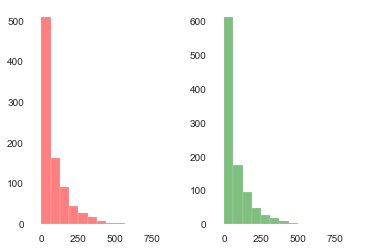

In [14]:
revDesc1 = GetStatsForRevenue()

fig, ax = plt.subplots(1,2)
ax[0].hist(movies_data['Revenue (Millions)'], bins=15, alpha = 0.5, color = 'r')

print("Before Filling Values: ")
print('-----------------------')
print(revDesc1)
print('-----------------------')

movies_data['Revenue (Millions)'] = movies_data.groupby(['Runtime (Minutes)','Rating'])['Revenue (Millions)'].apply(lambda x: x.fillna(x.median()))
movies_data['Revenue (Millions)'] = movies_data.groupby(['Genre'])['Revenue (Millions)'].apply(lambda x: x.fillna(x.median()))
movies_data['Revenue (Millions)'] = movies_data['Revenue (Millions)'].fillna(movies_data['Revenue (Millions)'].median())

revDesc2 = GetStatsForRevenue()

print("After Filling Values: ")
print('-----------------------')
print(revDesc2)

ax[1].hist(movies_data['Revenue (Millions)'], bins=15, alpha = 0.5, color = 'g')

plt.show()

Before Filling Values: 
-----------------------
{'Mean': 58.98504273504273, 'Median': 59.5, 'Std': 17.194757023263836, 'Min': 11.0, 'Max': 100.0, 'Quartile': 0.25    47.0
0.50    59.5
0.75    72.0
Name: Metascore, dtype: float64}
-----------------------
After Filling Values: 
-----------------------
{'Mean': 59.0775, 'Median': 60.0, 'Std': 16.903860039477205, 'Min': 11.0, 'Max': 100.0, 'Quartile': 0.25    47.0
0.50    60.0
0.75    72.0
Name: Metascore, dtype: float64}
-----------------------


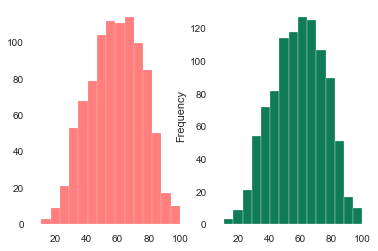

In [15]:
metaDesc1 = GetStatsForMetascore()

print("Before Filling Values: ")
print('-----------------------')
print(metaDesc1)
print('-----------------------')

fig, ax = plt.subplots(1,2)
ax[0].hist(movies_data['Metascore'], bins=15, alpha = 0.5, color = 'r')

movies_data['Metascore'] = movies_data.groupby(by=['Revenue (Millions)'])['Metascore'].apply(lambda x: x.fillna(x.median()))
movies_data['Metascore'] = movies_data.groupby(by=['Rating'])['Metascore'].apply(lambda x: x.fillna(x.median()))
movies_data['Metascore'].plot(kind='hist',bins=15)

metaDesc2 = GetStatsForMetascore()

print("After Filling Values: ")
print('-----------------------')
print(metaDesc2)
print('-----------------------')

ax[1].hist(movies_data['Metascore'], bins=15, alpha = 0.5, color = 'g')

plt.show()

In [16]:
movies_data.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

#### Observations
> We can see that there are no null values in our dataset.

> Please note that the above method of filling in the null values has been arrived with a number of iterations on a rough notebook.

In [17]:
# We had also observed that there were two records with the same movie title. Let us see which are those two records:
movies_data[movies_data['Title'] == movies_data[movies_data['Title'].duplicated() == True]['Title'].tolist()[0]]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


> We can conclude here that these are two different titles.

<a id='section6.5'></a>
#### 6.5 Dropping the columns which are not required

In [18]:
movies_data.drop(['Rank','Title'],axis=1,inplace=True)

<a id='section6.6'></a>
#### 6.6 Adding new fields

In [19]:
movies_data['GenreCount'] = [len(x.split(',')) for x in movies_data['Genre']]
movies_data['ActorCount'] = [len(x.split(',')) for x in movies_data['Actors']]
movies_data[['Genre1','Genre2','Genre3']] = movies_data['Genre'].str.split(',',expand=True)
movies_data[['Actor1','Actor2','Actor3','Actor4']] = movies_data['Actors'].str.split(',',expand=True)

<a id='section7'></a>
### 7. Post-profiling the Dataset

In [20]:
profile = pandas_profiling.ProfileReport(movies_data)
profile.to_file(output_file='movies_data_after_pre_processing.html')

#### Observations:

> There are no missing values

> All the distributions and statistics are almost identical and in a close range to the earlier values

<a id='section8'></a>
### 8. Data Normalisation

<a id='section8.1'></a>
#### 8.1 Creating Sub DataFrames

#### We saw that there were 7 categorical fields in the pre-profiling sheet. Below are these fields:

> Rank

> Year

> Runtime (Minutes)

> Rating

> Votes

> Revenue (Millions)

> Metascore

#### Let us create the ranges of each of these numerical fields. This would be needed for bivariate analysis with Revenue as we go along the EDA. Exclusions - Rank, Year & Revenue.

In [21]:
movies_data['Runtime_Duration'] = pd.cut(movies_data['Runtime (Minutes)'],
                                         [0,60,120,movies_data['Runtime (Minutes)'].max()],
                                         labels=['Less than an hour','1-2 Hours','More than 2 Hours'], include_lowest=True)
movies_data['Rating_Range'] = pd.cut(movies_data['Rating'],
                                    [0,2.5,5,7.5,10],
                                    labels=['0-2.5','2.5-5','5-7.5','7.5-10'],include_lowest=True)
movies_data['Votes_Range'] = pd.cut(movies_data['Votes'],
                                    [0,250000,500000,750000,movies_data['Votes'].max()],
                                    labels=['0-2.5L','2.5L-5L','5L-7.5L','7.5L+'],include_lowest=True)
movies_data['Metascore_Range'] = pd.cut(movies_data['Metascore'],
                                    [0,25,50,75,100],
                                    labels=['0-25','25-50','50-75','75-100'],include_lowest=True)

#### Let us find out the list of genres

In [71]:
genreItems = []
genreItems.append(list(movies_data['Genre1'].unique()))
genreItems.append(list(movies_data['Genre2'].unique()))
genreItems.append(list(movies_data['Genre3'].unique()))
genreList = [item for sublist in genreItems for item in sublist]
genreList = pd.Series(genreList)
genreList = genreList.unique()
genreList

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', nan, 'Family', 'History', 'Music', 'Western',
       'War', 'Musical', 'Sport'], dtype=object)

#### Let us remove 'None' from the list.

In [44]:
genreList = genreList[(genreList != np.array(None))]
genreList

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', nan, 'Family', 'History', 'Music', 'Western',
       'War', 'Musical', 'Sport'], dtype=object)

#### Let us find out the frequency of each genre in the dataset

In [65]:
genreCountDict = {}
for w in genreList:
    genreCountDict[w] = list(movies_data['Genre1']).count(w)+list(movies_data['Genre2']).count(w)+list(movies_data['Genre3']).count(w)
genreCountDict

{'Action': 303,
 'Adventure': 259,
 'Horror': 119,
 'Animation': 49,
 'Comedy': 279,
 'Biography': 81,
 'Drama': 513,
 'Crime': 150,
 'Romance': 141,
 'Mystery': 106,
 'Thriller': 195,
 'Sci-Fi': 120,
 'Fantasy': 101,
 nan: 445,
 'Family': 51,
 'History': 29,
 'Music': 16,
 'Western': 7,
 'War': 13,
 'Musical': 5,
 'Sport': 18}

#### Let us create a genre master

In [66]:
df_genre = pd.DataFrame(data=genreCountDict.items(),columns=['Genre','Frequency'])
df_genre= df_genre.sort_values(by=['Frequency'],ascending=False)
df_genre.reset_index(inplace=True)
df_genre.drop(labels=['index'],axis=1,inplace=True)
df_genre

,Genre,Frequency
0,Drama,513
1,NaN,445
2,Action,303
3,Comedy,279
4,Adventure,259
5,Thriller,195
6,Crime,150
7,Romance,141
8,Sci-Fi,120
9,Horror,119


#### Let us add a few more columns in the genre master - Revenue & Ratings

In [67]:
totalRevList = []
totalRatingList = []
for genre in df_genre['Genre']:
    tempList = []
    tempList.append(genre)
    totalRevList.append(movies_data[movies_data['Genre1'].isin(tempList)]['Revenue (Millions)'].sum()+movies_data[movies_data['Genre2'].isin(tempList)]['Revenue (Millions)'].sum()+movies_data[movies_data['Genre3'].isin(tempList)]['Revenue (Millions)'].sum())
    totalRatingList.append(movies_data[movies_data['Genre1'].isin(tempList)]['Rating'].sum()+movies_data[movies_data['Genre2'].isin(tempList)]['Rating'].sum()+movies_data[movies_data['Genre3'].isin(tempList)]['Rating'].sum())
df_genre['Total Revenue (Millions)'] = pd.Series(totalRevList)
df_genre['Avg Revenue (Millions)'] = df_genre['Total Revenue (Millions)'] / df_genre['Frequency']
df_genre['Total Rating'] = pd.Series(totalRatingList)
df_genre['Avg Rating'] = df_genre['Total Rating'] / df_genre['Frequency']
df_genre.drop('Total Rating',axis=1,inplace=True)

In [68]:
totalRevList06 = []
totalRevList16 = []
totalRatingList06 = []
totalRatingList16 = []
for genre in df_genre['Genre']:
    tempList = []
    tempList.append(genre)
    totalRevList06.append(movies_data[(movies_data['Genre1'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Genre2'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Genre3'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum())
    totalRatingList06.append(movies_data[(movies_data['Genre1'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum()+movies_data[(movies_data['Genre2'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum()+movies_data[(movies_data['Genre3'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum())
    totalRevList16.append(movies_data[(movies_data['Genre1'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Genre2'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Genre3'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum())
    totalRatingList16.append(movies_data[(movies_data['Genre1'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum()+movies_data[(movies_data['Genre2'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum()+movies_data[(movies_data['Genre3'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum())    
df_genre['Revenue - 2006'] = pd.Series(totalRevList06)
df_genre['Ratings - 2006'] = pd.Series(totalRatingList06)
df_genre['Revenue - 2016'] = pd.Series(totalRevList16)
df_genre['Ratings - 2016'] = pd.Series(totalRatingList16)
df_genre['Revenue - Growth'] = ((df_genre['Revenue - 2016']/df_genre['Revenue - 2006']) ** (1/(2016-2006)) - 1) * 100

In [70]:
df_genre.dropna(inplace=True)
df_genre

,Genre,Frequency,Total Revenue (Millions),Avg Revenue (Millions),Avg Rating,Revenue - 2006,Ratings - 2006,Revenue - 2016,Ratings - 2016,Revenue - Growth
0,Drama,513,25612.0850,49.926092,6.953801,1262.52,192.9,5922.030,1091.2,16.714075
2,Action,303,36733.4400,121.232475,6.614521,1668.57,75.7,5835.935,473.6,13.338276
3,Comedy,279,20416.3150,73.176756,6.647670,916.04,81.9,4952.750,536.8,18.384051
4,Adventure,259,39341.8400,151.898996,6.772201,1599.32,91.9,7084.950,404.4,16.048663
5,Thriller,195,12425.6175,63.721115,6.593333,831.39,74.4,2321.320,370.6,10.813589
6,Crime,150,9327.0700,62.180467,6.786667,407.34,49.5,1977.130,257.2,17.113731
7,Romance,141,5908.8950,41.907057,6.685816,168.31,26.7,729.910,199.5,15.801968
8,Sci-Fi,120,15285.5700,127.379750,6.716667,311.35,49.9,2207.875,123.7,21.638922
9,Horror,119,4347.2100,36.531176,6.089916,98.73,26.5,1531.460,258.5,31.542367
10,Mystery,106,5662.4650,53.419481,6.886792,520.79,57.3,936.935,130.7,6.048537


#### Let us repeat these steps for list of actors as well

In [75]:
actorNames = []
actorNames.append(list(movies_data['Actor1'].unique()))
actorNames.append(list(movies_data['Actor2'].unique()))
actorNames.append(list(movies_data['Actor3'].unique()))
actorNames.append(list(movies_data['Actor4'].unique()))
actorList = [item for sublist in actorNames for item in sublist]
actorList = pd.Series(actorList)
actorList = actorList.unique()
actorList = actorList[actorList != np.array(None)]

actorCountDict = {}
for w in actorList:
    actorCountDict[w] = list(movies_data['Actor1']).count(w)+list(movies_data['Actor2']).count(w)+list(movies_data['Actor3']).count(w)+list(movies_data['Actor4']).count(w)

df_actor = pd.DataFrame(data=actorCountDict.items(),columns=['Actor','Frequency'])
df_actor= df_actor.sort_values(by=['Frequency'],ascending=False)
df_actor.reset_index(inplace=True)
df_actor.drop(labels=['index'],axis=1,inplace=True)

totalRevList = []
totalRatingList = []
for actor in df_actor['Actor']:
    tempList = []
    tempList.append(actor)
    totalRevList.append(movies_data[movies_data['Actor1'].isin(tempList)]['Revenue (Millions)'].sum()+movies_data[movies_data['Actor2'].isin(tempList)]['Revenue (Millions)'].sum()+movies_data[movies_data['Actor3'].isin(tempList)]['Revenue (Millions)'].sum()+movies_data[movies_data['Actor4'].isin(tempList)]['Revenue (Millions)'].sum())
    totalRatingList.append(movies_data[movies_data['Actor1'].isin(tempList)]['Rating'].sum()+movies_data[movies_data['Actor2'].isin(tempList)]['Rating'].sum()+movies_data[movies_data['Actor3'].isin(tempList)]['Rating'].sum()+movies_data[movies_data['Actor4'].isin(tempList)]['Rating'].sum())
df_actor['Total Revenue (Millions)'] = pd.Series(totalRevList)
df_actor['Avg Revenue (Millions)'] = df_actor['Total Revenue (Millions)'] / df_actor['Frequency']
df_actor['Total Rating'] = pd.Series(totalRatingList)
df_actor['Avg Rating'] = df_actor['Total Rating'] / df_actor['Frequency']
df_actor.drop('Total Rating',axis=1,inplace=True)

totalRevList06 = []
totalRevList16 = []
totalRatingList06 = []
totalRatingList16 = []
for actor in df_actor['Actor']:
    tempList = []
    tempList.append(actor)
    totalRevList06.append(movies_data[(movies_data['Actor1'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Actor2'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Actor3'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Actor4'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum())
    totalRatingList06.append(movies_data[(movies_data['Actor1'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum()+movies_data[(movies_data['Actor2'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum()+movies_data[(movies_data['Actor3'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum()+movies_data[(movies_data['Actor4'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum())
    totalRevList16.append(movies_data[(movies_data['Actor1'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Actor2'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Actor3'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum()+movies_data[(movies_data['Actor4'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum())
    totalRatingList16.append(movies_data[(movies_data['Actor1'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum()+movies_data[(movies_data['Actor2'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum()+movies_data[(movies_data['Actor3'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum()+movies_data[(movies_data['Actor4'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum())
df_actor['Revenue - 2006'] = pd.Series(totalRevList06)
df_actor['Ratings - 2006'] = pd.Series(totalRatingList06)
df_actor['Revenue - 2016'] = pd.Series(totalRevList16)
df_actor['Ratings - 2016'] = pd.Series(totalRatingList16)
df_actor['Revenue - Growth'] = ((df_actor['Revenue - 2016']/df_actor['Revenue - 2006']) ** (1/(2016-2006)) - 1) * 100

df_actor

,Actor,Frequency,Total Revenue (Millions),Avg Revenue (Millions),Avg Rating,Revenue - 2006,Ratings - 2006,Revenue - 2016,Ratings - 2016,Revenue - Growth
0,Christian Bale,11,1559.62,141.783636,7.318182,58.56,15.8,0.00,0.0,-100.000000
1,Mark Wahlberg,11,1052.09,95.644545,6.690909,0.00,0.0,93.14,14.6,inf
2,Brad Pitt,9,703.25,78.138889,7.466667,34.30,7.5,40.07,7.1,1.566976
3,Denzel Washington,9,745.87,82.874444,7.200000,93.06,14.6,151.02,14.2,4.960802
4,Rose Byrne,9,702.14,78.015556,6.522222,0.00,0.0,55.29,5.7,inf
...,...,...,...,...,...,...,...,...,...,...
2390,Kristin Scott Thomas,1,44.99,44.990000,6.900000,0.00,0.0,0.00,0.0,NaN
2391,Elizabeth Henstridge,1,34.33,34.330000,4.600000,0.00,0.0,34.33,4.6,inf
2392,Amber Tamblyn,1,18.33,18.330000,7.600000,0.00,0.0,0.00,0.0,NaN
2393,Jason Barry,1,20.30,20.300000,5.400000,0.00,0.0,20.30,5.4,inf


#### Let us repeat these steps for Directors as well

In [77]:
directorNames = []
directorNames.append(list(movies_data['Director'].unique()))
directorList = [item for sublist in directorNames for item in sublist]
directorList = pd.Series(directorList)
directorList = directorList.unique()
directorList = directorList[directorList != np.array(None)]

directorCountDict = {}
for w in directorList:
    directorCountDict[w] = list(movies_data['Director']).count(w)

df_director = pd.DataFrame(data=directorCountDict.items(),columns=['Director','Frequency'])
df_director= df_director.sort_values(by=['Frequency'],ascending=False)
df_director.reset_index(inplace=True)
df_director.drop(labels=['index'],axis=1,inplace=True)

totalRevList = []
totalRatingList = []
for director in df_director['Director']:
    tempList = []
    tempList.append(director)
    totalRevList.append(movies_data[movies_data['Director'].isin(tempList)]['Revenue (Millions)'].sum())
    totalRatingList.append(movies_data[movies_data['Director'].isin(tempList)]['Rating'].sum())
df_director['Total Revenue (Millions)'] = pd.Series(totalRevList)
df_director['Avg Revenue (Millions)'] = df_genre['Total Revenue (Millions)'] / df_genre['Frequency']
df_director['Total Rating'] = pd.Series(totalRatingList)
df_director['Avg Rating'] = df_director['Total Rating'] / df_director['Frequency']
df_director.drop('Total Rating',axis=1,inplace=True)

totalRevList06 = []
totalRevList16 = []
totalRatingList06 = []
totalRatingList16 = []
for director in df_director['Director']:
    tempList = []
    tempList.append(director)
    totalRevList06.append(movies_data[(movies_data['Director'].isin(tempList)) & (movies_data['Year'] == 2006)]['Revenue (Millions)'].sum())
    totalRatingList06.append(movies_data[(movies_data['Director'].isin(tempList)) & (movies_data['Year'] == 2006)]['Rating'].sum())
    totalRevList16.append(movies_data[(movies_data['Director'].isin(tempList)) & (movies_data['Year'] == 2016)]['Revenue (Millions)'].sum())
    totalRatingList16.append(movies_data[(movies_data['Director'].isin(tempList)) & (movies_data['Year'] == 2016)]['Rating'].sum())
df_director['Revenue - 2006'] = pd.Series(totalRevList06)
df_director['Ratings - 2006'] = pd.Series(totalRatingList06)
df_director['Revenue - 2016'] = pd.Series(totalRevList16)
df_director['Ratings - 2016'] = pd.Series(totalRatingList16)
df_director['Revenue - Growth'] = ((df_director['Revenue - 2016']/df_director['Revenue - 2006']) ** (1/(2016-2006)) - 1) * 100

df_director

,Director,Frequency,Total Revenue (Millions),Avg Revenue (Millions),Avg Rating,Revenue - 2006,Ratings - 2006,Revenue - 2016,Ratings - 2016,Revenue - Growth
0,Ridley Scott,8,719.06,49.926092,6.850000,7.46,6.9,0.00,0.0,-100.000000
1,David Yates,6,1630.51,NaN,7.433333,0.00,0.0,360.61,13.8,inf
2,M. Night Shyamalan,6,463.91,121.232475,5.533333,42.27,5.6,138.12,7.3,12.569939
3,Paul W.S. Anderson,6,208.92,73.176756,5.766667,0.00,0.0,26.84,5.6,inf
4,Michael Bay,6,1421.32,151.898996,6.483333,0.00,0.0,52.82,7.3,inf
...,...,...,...,...,...,...,...,...,...,...
639,Lee Toland Krieger,1,42.48,NaN,7.200000,0.00,0.0,0.00,0.0,NaN
640,Gillies MacKinnon,1,42.41,NaN,5.000000,0.00,0.0,42.41,5.0,inf
641,Peter Atencio,1,20.57,NaN,6.300000,0.00,0.0,20.57,6.3,inf
642,James Mangold,1,132.55,NaN,6.700000,0.00,0.0,0.00,0.0,NaN


<a id='section9'></a>
### 9. Exploratory Data Analysis

<a id='section9.1'></a>
#### 9.1 Univariate

###### Genre

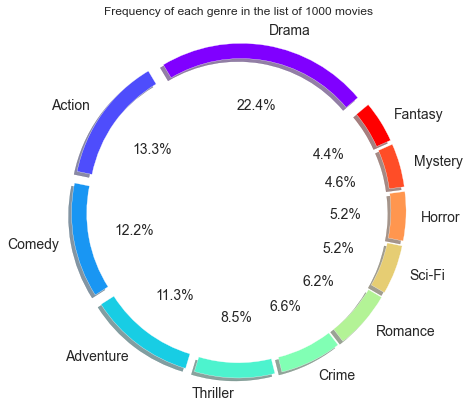

In [78]:
space = np.ones(11)/10
df_genre['Frequency'][:11].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.1), 
                               shadow=True, startangle=40, figsize=(7,7), cmap='rainbow',legend=False,
                               labels=df_genre['Genre'])

plt.ylabel(None)
plt.title('Frequency of each genre in the list of 1000 movies')
plt.show()

##### Actor

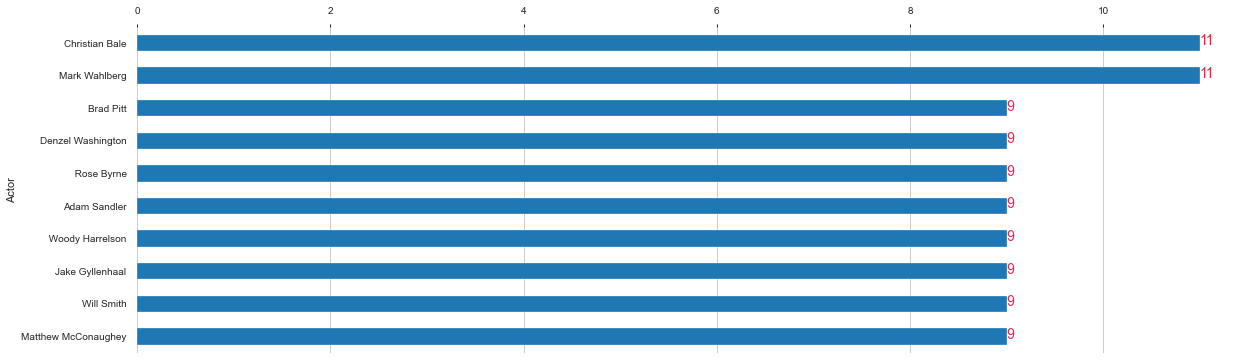

In [217]:
df_actor.reset_index(inplace=True)
df_actor.set_index('Actor',inplace=True)
axes = df_actor['Frequency'][:10].plot.barh(figsize=(20,6),position=0.5)
# set individual bar lables using above list
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.32,
            str(int(i.get_width())), fontsize=14,color='#F12345')
axes.xaxis.tick_top()
plt.gca().invert_yaxis()
plt.gca().xaxis.grid()
plt.show()

##### Year

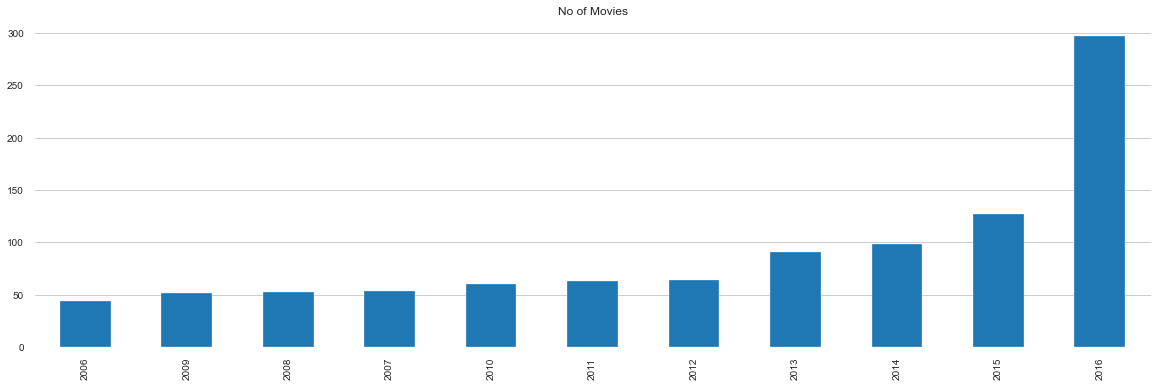

In [215]:
movies_data['Year'].value_counts().plot(kind='bar',figsize=(20,6))
plt.gca().invert_xaxis()
plt.title('No of Movies')
plt.gca().yaxis.grid()
plt.show()

##### Revenue

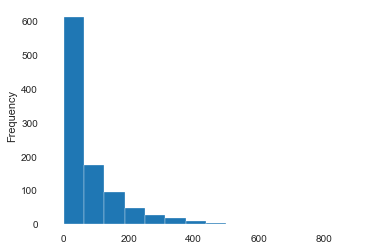

In [87]:
movies_data['Revenue (Millions)'].plot(kind='hist',bins=15)
plt.show()

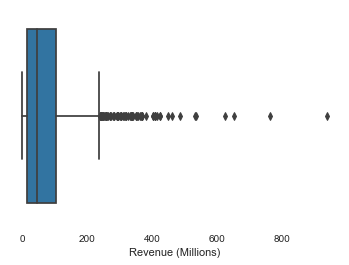

In [89]:
sns.boxplot(x=movies_data['Revenue (Millions)'])
plt.show()

##### Runtime

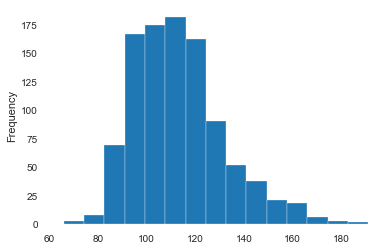

In [90]:
movies_data['Runtime (Minutes)'].plot(kind='hist',bins=15)
plt.show()

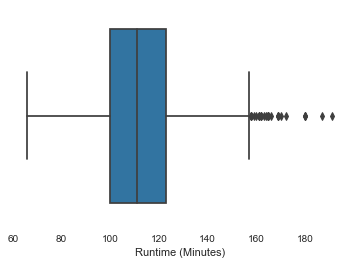

In [91]:
sns.boxplot(x=movies_data['Runtime (Minutes)'])
plt.show()

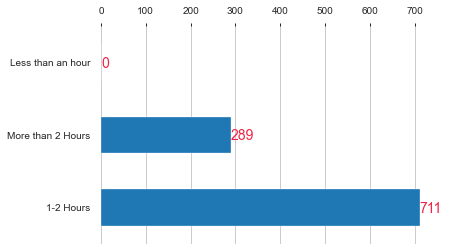

In [92]:
axes = movies_data['Runtime_Duration'].value_counts().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.show()

##### Rating

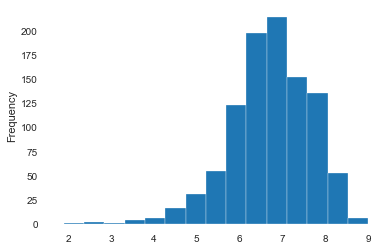

In [93]:
movies_data['Rating'].plot(kind='hist',bins=15)
plt.show()

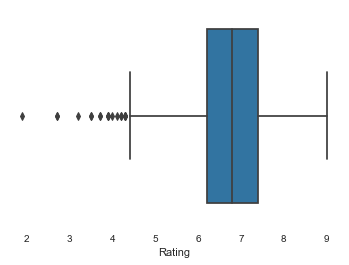

In [94]:
sns.boxplot(x=movies_data['Rating'])
plt.show()

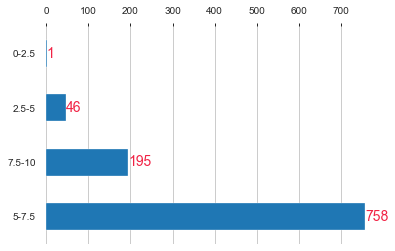

In [95]:
axes = movies_data['Rating_Range'].value_counts().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.show()

#### Votes

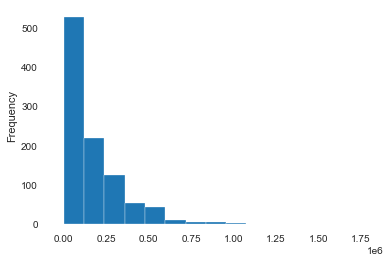

In [96]:
movies_data['Votes'].plot(kind='hist',bins=15)
plt.show()

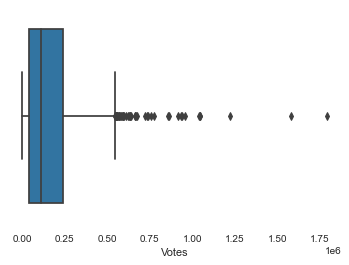

In [97]:
sns.boxplot(x=movies_data['Votes'])
plt.show()

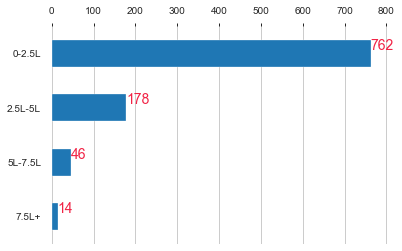

In [98]:
axes = movies_data['Votes_Range'].value_counts().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().invert_yaxis()
plt.gca().xaxis.grid()
plt.show()

#### Genre Count

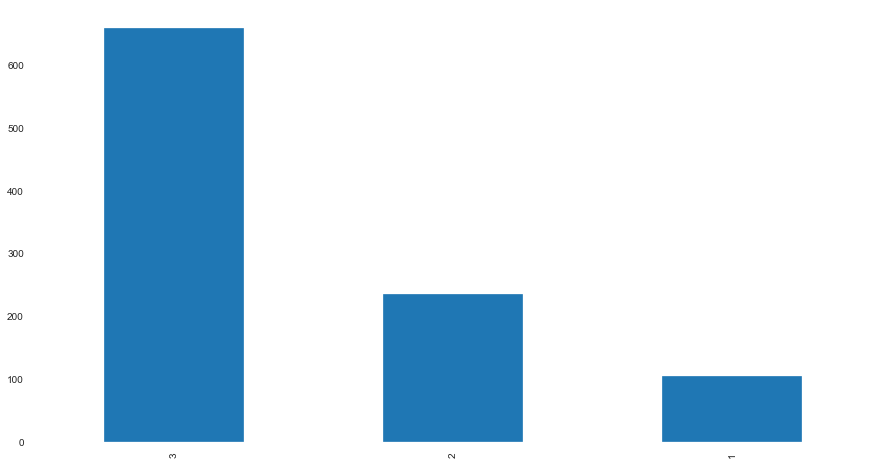

In [100]:
movies_data['GenreCount'].value_counts().plot.bar(figsize=(15,8))
plt.show()

#### Actor Count

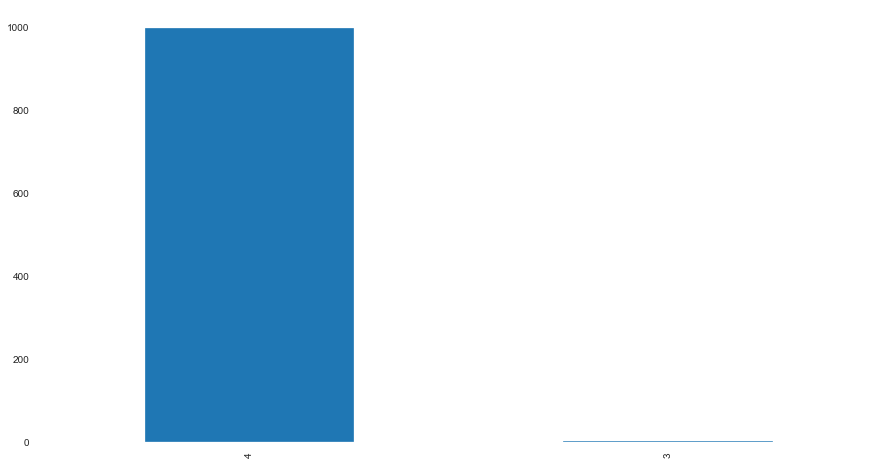

In [101]:
movies_data['ActorCount'].value_counts().plot.bar(figsize=(15,8))
plt.show()

#### Metascore

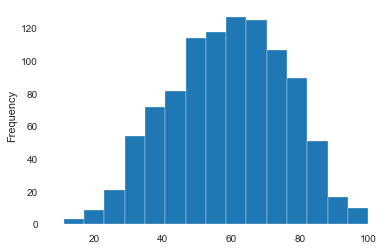

In [102]:
movies_data['Metascore'].plot(kind='hist',bins=15)
plt.show()

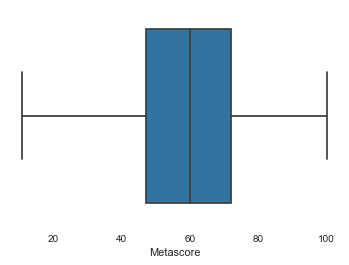

In [103]:
sns.boxplot(x=movies_data['Metascore'])
plt.show()

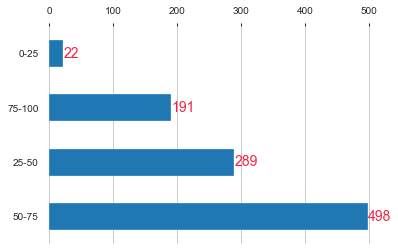

In [104]:
axes = movies_data['Metascore_Range'].value_counts().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().xaxis.grid()
plt.show()

#### Director

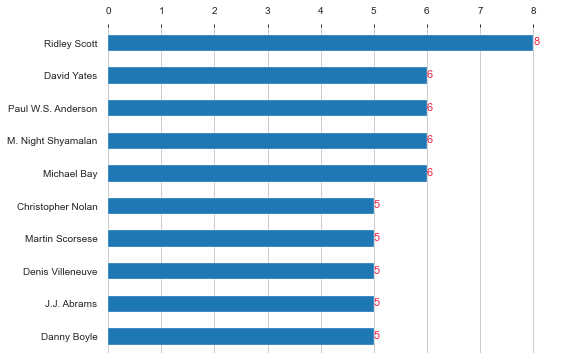

In [105]:
axes = movies_data['Director'].value_counts()[:10].plot(kind='barh',figsize=(8,6))
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.32,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
plt.gca().xaxis.grid()
plt.show()

<a id='section9.2'></a>
### 9.2 Bivariate

##### Y-O-Y Behavior of Revenue, Ratings and Runtime

In [108]:
movies_annual_data = movies_data.copy()
movies_annual_data.set_index('Year',inplace=True)

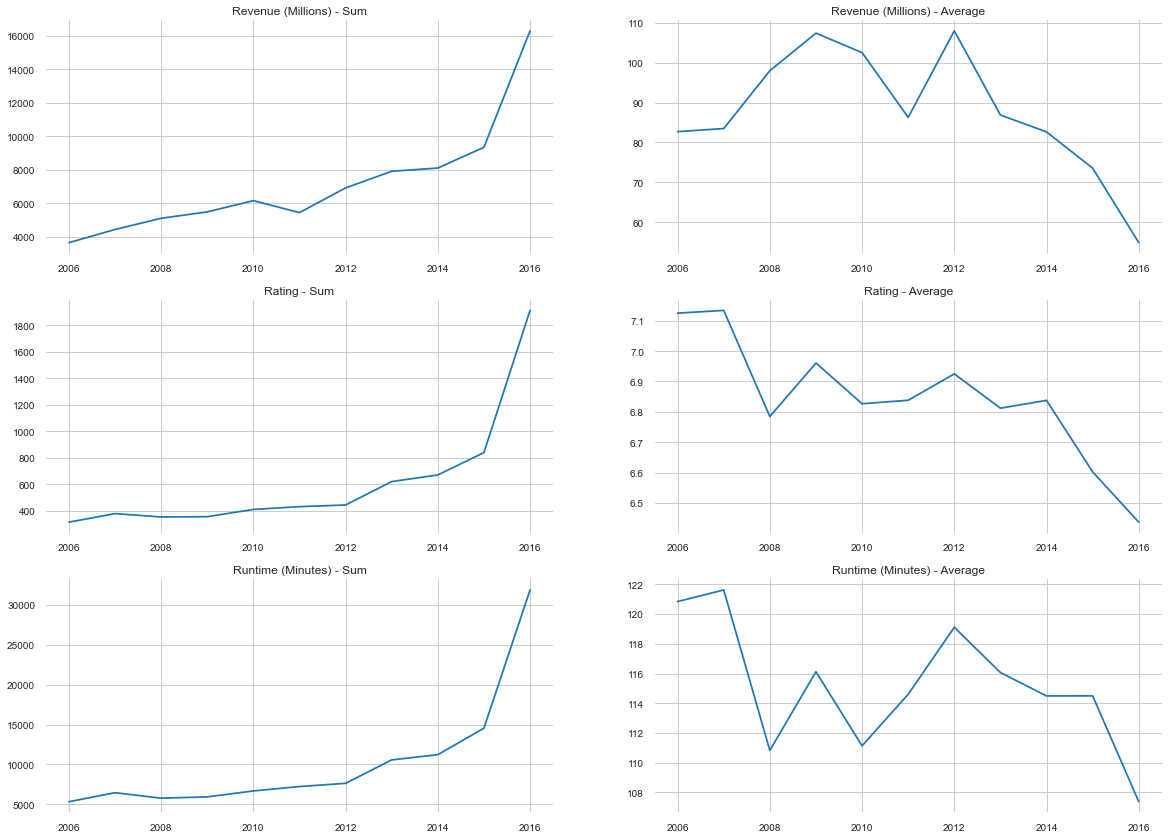

In [109]:
fig,axes = plt.subplots(3,2,figsize=(20,10))
axes[0,0].plot(movies_annual_data[['Revenue (Millions)']].groupby('Year').sum())
axes[0,0].set(title='Revenue (Millions) - Sum')
axes[0,0].grid()

axes[0,1].plot(movies_annual_data[['Revenue (Millions)']].groupby('Year').mean())
axes[0,1].set(title='Revenue (Millions) - Average')
axes[0,1].grid()

axes[1,0].plot(movies_annual_data[['Rating']].groupby('Year').sum())
axes[1,0].set(title='Rating - Sum')
axes[1,0].grid()

axes[1,1].plot(movies_annual_data[['Rating']].groupby('Year').mean())
axes[1,1].set(title='Rating - Average')
axes[1,1].grid()

axes[2,0].plot(movies_annual_data[['Runtime (Minutes)']].groupby('Year').sum())
axes[2,0].set(title='Runtime (Minutes) - Sum')
axes[2,0].grid()

axes[2,1].plot(movies_annual_data[['Runtime (Minutes)']].groupby('Year').mean())
axes[2,1].set(title='Runtime (Minutes) - Average')
axes[2,1].grid()

plt.subplots_adjust(bottom=0.1,top=1.2)

##### Runtime Vs Revenue

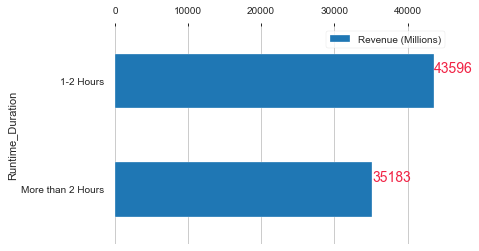

In [209]:
movies_annual_data.reset_index(inplace=True)
movies_annual_data.set_index('Runtime_Duration',inplace=True)
axes = movies_annual_data[['Revenue (Millions)']].groupby('Runtime_Duration').sum().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

##### Rating Vs Revenue

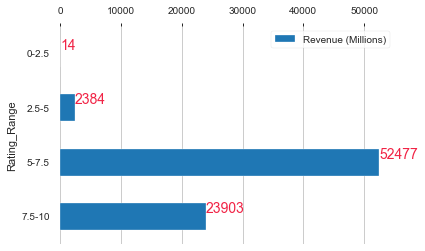

In [112]:
movies_annual_data.reset_index(inplace=True)
movies_annual_data.set_index('Rating_Range',inplace=True)
axes = movies_annual_data[['Revenue (Millions)']].groupby('Rating_Range').sum().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

##### No of Votes Vs Revenue

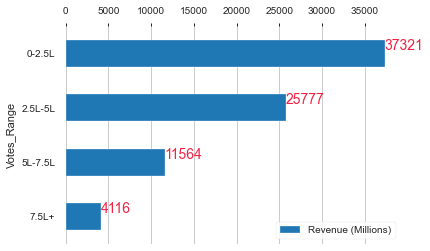

In [115]:
movies_annual_data.reset_index(inplace=True)
movies_annual_data.set_index('Votes_Range',inplace=True)
axes = movies_annual_data[['Revenue (Millions)']].groupby('Votes_Range').sum().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

##### Metascore Vs Revenue

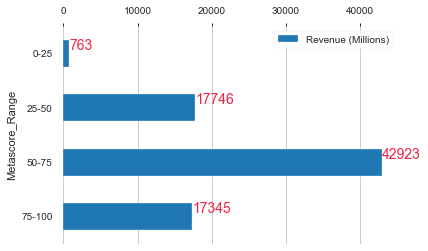

In [116]:
movies_annual_data.reset_index(inplace=True)
movies_annual_data.set_index('Metascore_Range',inplace=True)
axes = movies_annual_data[['Revenue (Millions)']].groupby('Metascore_Range').sum().plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.18,
            str(int(i.get_width())), fontsize=14,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

##### Top 10 Directors by Revenue

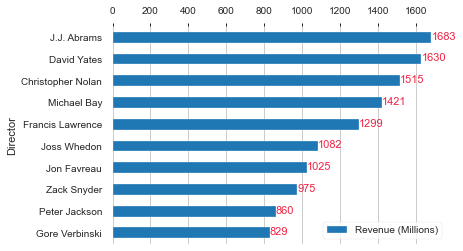

In [117]:
movies_annual_data.reset_index(inplace=True)
movies_annual_data.set_index('Director',inplace=True)
axes = movies_annual_data[['Revenue (Millions)']].groupby('Director').sum().sort_values(by=['Revenue (Millions)'],
                                                                                         ascending=False)[:10].plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.35,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

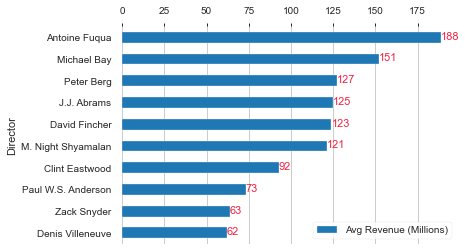

In [131]:
df_director.reset_index(inplace=True)
df_director.set_index('Director',inplace=True)
axes = df_director[['Avg Revenue (Millions)']].groupby('Director').sum().sort_values(by=['Avg Revenue (Millions)'],
                                                                                         ascending=False)[:10].plot.barh()
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.35,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

##### Top Actors by Revenue

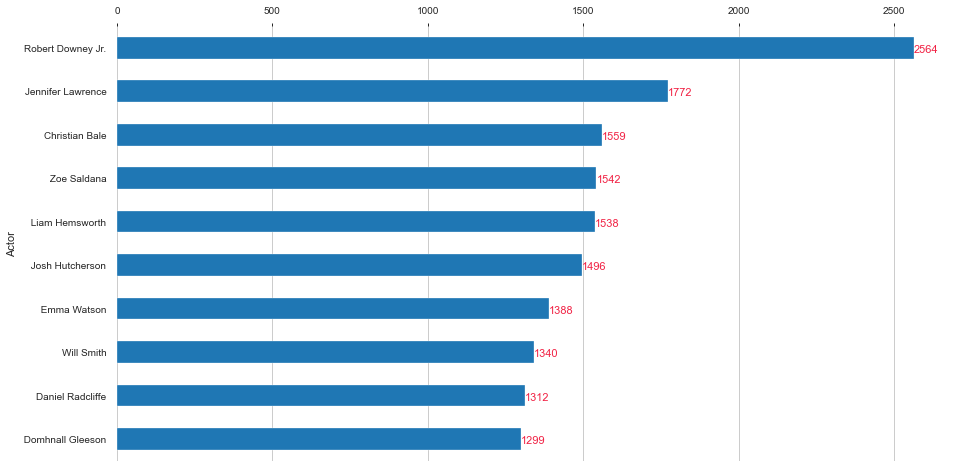

In [211]:
df_actor.reset_index(inplace=True)
df_actor.set_index('Actor',inplace=True)
axes = df_actor.sort_values(by=['Total Revenue (Millions)'],ascending=False)['Total Revenue (Millions)'][:10].plot(kind='barh',
                                                                                                              figsize=(15,8))
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.35,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

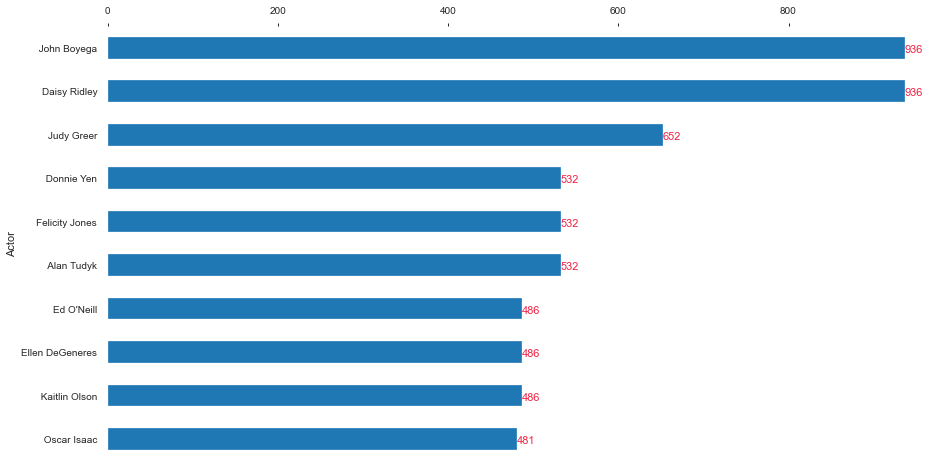

In [212]:
df_actor.reset_index(inplace=True)
df_actor.set_index('Actor',inplace=True)
axes = df_actor.sort_values(by=['Avg Revenue (Millions)'],ascending=False)['Avg Revenue (Millions)'][:10].plot(kind='barh',
                                                                                                          figsize=(15,8))
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.35,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
plt.gca().xaxis.grid()
axes.xaxis.grid()

##### Top Genres by Revenue

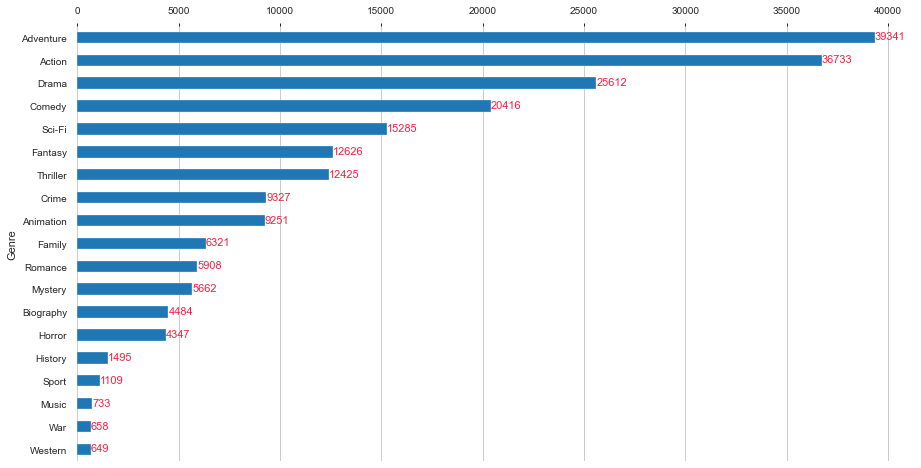

In [123]:
df_genre.reset_index(inplace=True)
df_genre.set_index('Genre',inplace=True)
axes = df_genre.sort_values(by=['Total Revenue (Millions)'],ascending=False)['Total Revenue (Millions)'].plot(kind='barh',
                                                                                                              figsize=(15,8))
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.35,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
axes.xaxis.grid()

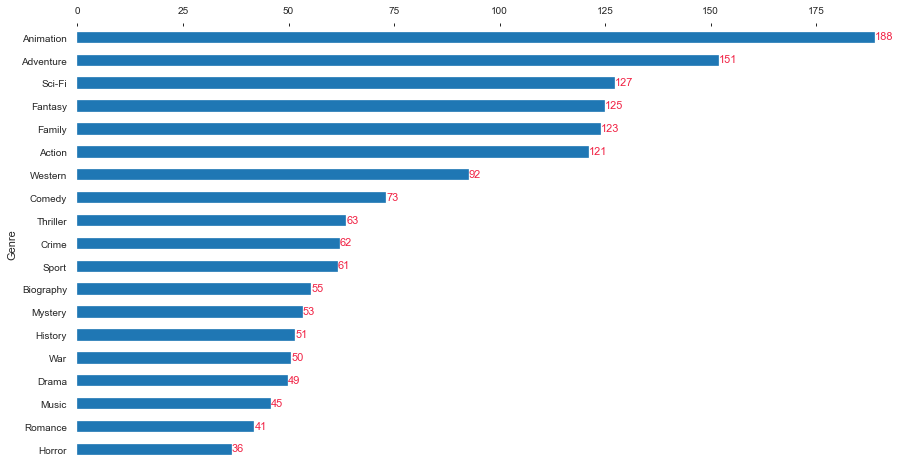

In [124]:
df_genre.reset_index(inplace=True)
df_genre.set_index('Genre',inplace=True)
axes = df_genre.sort_values(by=['Avg Revenue (Millions)'],ascending=False)['Avg Revenue (Millions)'].plot(kind='barh',
                                                                                                          figsize=(15,8))
axes.xaxis.tick_top()
for i in axes.patches:
    # get_width pulls left or right; get_y pushes up or down
    axes.text(i.get_width(), i.get_y()+.35,
            str(int(i.get_width())), fontsize=11,color='#F12345')
plt.gca().invert_yaxis()
plt.gca().xaxis.grid()
axes.xaxis.grid()

##### Genre Count Vs Revenue

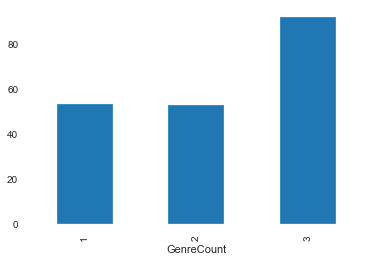

In [136]:
movies_data.groupby('GenreCount')['Revenue (Millions)'].mean().plot.bar()
plt.show()

##### Actor Count Vs Revenue

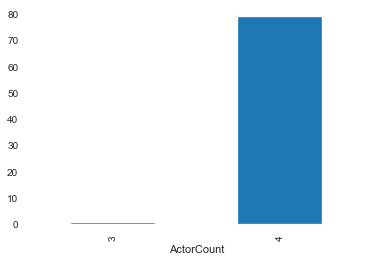

In [137]:
movies_data.groupby('ActorCount')['Revenue (Millions)'].mean().plot.bar()
plt.show()

<a id='section9.3'></a>
### 9.3 Multivariate

##### Rating, Runtime & Metascore Vs Revenue

In [139]:
trace = go.Scatter(
    x = movies_data['Rating_Range'],
    y = movies_data['Runtime_Duration'],
    mode = 'markers+text',
    marker = dict(
        color = movies_data['Metascore'],
        colorscale = 'Rainbow',
        showscale = True,
        size = movies_data['Revenue (Millions)'],
        sizeref = 10
    ),
    hovertext = ['Revenue: ' + str(rev) + 'Millions' for rev in movies_data['Revenue (Millions)']]
)
data = [trace]
fig = go.Figure(
    data = data
)
offline.iplot(fig)

##### Which of the genres have sustained and performed over the period 2006-2016

> We will draw multiple sankey charts in order to visualise it.

> For drawing a sankey chart, we need the details on the nodes and the links for each genre. For this we would create a few new dataframes.

In [141]:
df_rating_genre1 = movies_data.groupby(['Genre1', 'Year'])["Rating"].apply(lambda x : x.mean())
df_rating_genre2 = movies_data.groupby(['Genre2', 'Year'])["Rating"].apply(lambda x : x.mean())
df_rating_genre3 = movies_data.groupby(['Genre3', 'Year'])["Rating"].apply(lambda x : x.mean())
df_rating_genre1.append(df_rating_genre2)
df_rating_genre1.append(df_rating_genre3)
df_rating_genre = pd.DataFrame(df_rating_genre1).reset_index()

df_revenue_genre1 = movies_data.groupby(['Genre1', 'Year'])["Revenue (Millions)"].apply(lambda x : x.sum())
df_revenue_genre2 = movies_data.groupby(['Genre2', 'Year'])["Revenue (Millions)"].apply(lambda x : x.sum())
df_revenue_genre3 = movies_data.groupby(['Genre3', 'Year'])["Revenue (Millions)"].apply(lambda x : x.sum())
df_revenue_genre1.append(df_revenue_genre2)
df_revenue_genre1.append(df_revenue_genre3)
df_revenue_genre = pd.DataFrame(df_revenue_genre1).reset_index()
df_genre_rating_revenue = pd.merge(left=df_rating_genre,right=df_revenue_genre,on=['Year','Genre1'],how='inner')
df_genre_rating_revenue.sort_values('Year',inplace=True)

##### Performance of Genres basis Revenue

In [180]:
df_sankey = pd.DataFrame()
df_sankey['Target'] = df_genre_rating_revenue['Year'] - 2005
df_sankey['Source'] = df_genre_rating_revenue['Year'] - 2006
df_sankey['Node, Label'] = df_genre_rating_revenue['Year']
df_sankey['Value'] = df_genre_rating_revenue['Revenue (Millions)']
df_sankey['NodeColor'] = ['#AAA' + str(x) for x in np.arange(100,206)]
df_sankey['LinkColor'] = ['#11A' + str(x) for x in np.arange(100,206)]
df_sankey['Genre1'] = df_genre_rating_revenue['Genre1']
df_sankey

,Target,Source,"Node, Label",Value,NodeColor,LinkColor,Genre1
0,1,0,2006,1668.570,#AAA100,#11A100,Action
66,1,0,2006,344.180,#AAA101,#11A101,Drama
81,1,0,2006,41.780,#AAA102,#11A102,Horror
55,1,0,2006,310.840,#AAA103,#11A103,Crime
44,1,0,2006,323.070,#AAA104,#11A104,Comedy
...,...,...,...,...,...,...,...
54,11,10,2016,1649.745,#AAA201,#11A201,Comedy
80,11,10,2016,44.990,#AAA202,#11A202,Fantasy
65,11,10,2016,1185.140,#AAA203,#11A203,Crime
21,11,10,2016,1146.470,#AAA204,#11A204,Adventure


In [145]:
df_genre.reset_index(inplace=True)

In [181]:
print('Performance of Genres basis Revenue')
for genre in df_genre.sort_values(['Frequency','Total Revenue (Millions)'],ascending=False)['Genre'][:5].tolist():
    data_trace = go.Sankey(
        node = dict(
            pad = 10,
            thickness = 30,
            label = df_sankey[df_sankey['Genre1'] == genre]['Node, Label'],
            color = df_sankey[df_sankey['Genre1'] == genre]['NodeColor']
        ),
        link = dict(
            source = df_sankey[df_sankey['Genre1'] == genre]['Source'],
            target = df_sankey[df_sankey['Genre1'] == genre]['Target'],
            value = df_sankey[df_sankey['Genre1'] == genre]['Value'],
            color = df_sankey[df_sankey['Genre1'] == genre]['LinkColor'],
            label = df_sankey[df_sankey['Genre1'] == genre]['Value']
        )
    )
    layout = go.Layout(
        title = genre + ' Genre Performance Over The Years',
        height = 500
    )
    fig = go.Figure(
        data = [data_trace],
        layout = layout
    )
    offline.iplot(fig)

Performance of Genres basis Revenue


##### Performance of Genres basis Ratings

In [182]:
df_sankey = pd.DataFrame()
df_sankey['Target'] = df_genre_rating_revenue['Year'] - 2005
df_sankey['Source'] = df_genre_rating_revenue['Year'] - 2006
df_sankey['Node, Label'] = df_genre_rating_revenue['Year']
df_sankey['Value'] = df_genre_rating_revenue['Rating']
df_sankey['NodeColor'] = ['#AAA' + str(x) for x in np.arange(100,206)]
df_sankey['LinkColor'] = ['#11A' + str(x) for x in np.arange(100,206)]
df_sankey['Genre1'] = df_genre_rating_revenue['Genre1']
df_sankey

,Target,Source,"Node, Label",Value,NodeColor,LinkColor,Genre1
0,1,0,2006,6.881818,#AAA100,#11A100,Action
66,1,0,2006,7.530000,#AAA101,#11A101,Drama
81,1,0,2006,6.400000,#AAA102,#11A102,Horror
55,1,0,2006,7.580000,#AAA103,#11A103,Crime
44,1,0,2006,6.742857,#AAA104,#11A104,Comedy
...,...,...,...,...,...,...,...
54,11,10,2016,6.334694,#AAA201,#11A201,Comedy
80,11,10,2016,3.200000,#AAA202,#11A202,Fantasy
65,11,10,2016,6.218182,#AAA203,#11A203,Crime
21,11,10,2016,6.664706,#AAA204,#11A204,Adventure


In [183]:
print('Performance of Genres basis Ratings')
for genre in df_genre.sort_values(['Frequency','Avg Rating'],ascending=False)['Genre'][:5].tolist():
    data_trace = go.Sankey(
        node = dict(
            pad = 10,
            thickness = 30,
            label = df_sankey[df_sankey['Genre1'] == genre]['Node, Label'],
            color = df_sankey[df_sankey['Genre1'] == genre]['NodeColor']
        ),
        link = dict(
            source = df_sankey[df_sankey['Genre1'] == genre]['Source'],
            target = df_sankey[df_sankey['Genre1'] == genre]['Target'],
            value = df_sankey[df_sankey['Genre1'] == genre]['Value'],
            color = df_sankey[df_sankey['Genre1'] == genre]['LinkColor'],
            label = df_sankey[df_sankey['Genre1'] == genre]['Value']
        )
    )
    layout = go.Layout(
        title = genre + ' Genre Performance Over The Years',
        height = 500
    )
    fig = go.Figure(
        data = [data_trace],
        layout = layout
    )
    offline.iplot(fig)

Performance of Genres basis Ratings


##### Which of the directors have sustained and performed over the period 2006-2016

> We will draw multiple sankey charts in order to visualise it.

> For drawing a sankey chart, we need the details on the nodes and the links for each genre. For this we would create a few new dataframes

In [203]:
df_rating_director = movies_data.groupby(['Director', 'Year'])["Rating"].apply(lambda x : x.mean())
df_rating_director = pd.DataFrame(df_rating_director).reset_index()

df_revenue_director = movies_data.groupby(['Director', 'Year'])["Revenue (Millions)"].apply(lambda x : x.sum())
df_revenue_director = pd.DataFrame(df_revenue_director).reset_index()
df_director_rating_revenue = pd.merge(left=df_rating_director,right=df_revenue_director,on=['Year','Director'],how='inner')
df_director_rating_revenue.sort_values('Year',inplace=True)

##### Performance of Directors basis Revenue

In [204]:
df_director_rating_revenue

,Director,Year,Rating,Revenue (Millions)
632,Mel Gibson,2006,7.8,50.86
27,Alexandre Aja,2006,6.4,41.78
399,James Gunn,2006,6.5,7.77
145,Christophe Gans,2006,6.6,46.98
104,Bong Joon Ho,2006,7.0,2.20
...,...,...,...,...
605,Mark Williams,2016,6.9,14.40
168,Craig Gillespie,2016,6.8,27.55
169,Cristian Mungiu,2016,7.5,0.13
158,Clay Kaytis,2016,6.3,107.51


In [185]:
df_sankey = pd.DataFrame()
df_sankey['Target'] = df_director_rating_revenue['Year'] - 2005
df_sankey['Source'] = df_director_rating_revenue['Year'] - 2006
df_sankey['Node, Label'] = df_director_rating_revenue['Year']
df_sankey['Value'] = df_director_rating_revenue['Revenue (Millions)']
df_sankey['NodeColor'] = ['#10' + str(x) for x in np.arange(1000,1987)]
df_sankey['LinkColor'] = ['#FA' + str(x) for x in np.arange(1000,1987)]
df_sankey['Director'] = df_director_rating_revenue['Director']
df_sankey

,Target,Source,"Node, Label",Value,NodeColor,LinkColor,Director
632,1,0,2006,50.86,#101000,#FA1000,Mel Gibson
27,1,0,2006,41.78,#101001,#FA1001,Alexandre Aja
399,1,0,2006,7.77,#101002,#FA1002,James Gunn
145,1,0,2006,46.98,#101003,#FA1003,Christophe Gans
104,1,0,2006,2.20,#101004,#FA1004,Bong Joon Ho
...,...,...,...,...,...,...,...
605,11,10,2016,14.40,#101982,#FA1982,Mark Williams
168,11,10,2016,27.55,#101983,#FA1983,Craig Gillespie
169,11,10,2016,0.13,#101984,#FA1984,Cristian Mungiu
158,11,10,2016,107.51,#101985,#FA1985,Clay Kaytis


In [186]:
print('Performance of Director basis Revenue')
for director in df_director.sort_values(['Frequency','Total Revenue (Millions)'],ascending=False)['Director'][:5].tolist():
    data_trace = go.Sankey(
        node = dict(
            pad = 10,
            thickness = 30,
            label = df_sankey[df_sankey['Director'] == director]['Node, Label'],
            color = df_sankey[df_sankey['Director'] == director]['NodeColor']
        ),
        link = dict(
            source = df_sankey[df_sankey['Director'] == director]['Source'],
            target = df_sankey[df_sankey['Director'] == director]['Target'],
            value = df_sankey[df_sankey['Director'] == director]['Value'],
            color = df_sankey[df_sankey['Director'] == director]['LinkColor'],
            label = df_sankey[df_sankey['Director'] == director]['Value']
        )
    )
    layout = go.Layout(
        title = director + ' Performance Over The Years',
        height = 500
    )
    fig = go.Figure(
        data = [data_trace],
        layout = layout
    )
    offline.iplot(fig)

Performance of Director basis Revenue


##### Performance of Directors basis Ratings

In [194]:
df_sankey = pd.DataFrame()
df_sankey['Target'] = df_director_rating_revenue['Year'] - 2005
df_sankey['Source'] = df_director_rating_revenue['Year'] - 2006
df_sankey['Node, Label'] = df_director_rating_revenue['Year']
df_sankey['Value'] = df_director_rating_revenue['Rating']
df_sankey['NodeColor'] = ['#4A' + str(x) for x in np.arange(1000,1987)]
df_sankey['LinkColor'] = ['#C1' + str(x) for x in np.arange(1000,1987)]
df_sankey['Director'] = df_director_rating_revenue['Director']
df_sankey

,Target,Source,"Node, Label",Value,NodeColor,LinkColor,Director
632,1,0,2006,7.8,#4A1000,#C11000,Mel Gibson
27,1,0,2006,6.4,#4A1001,#C11001,Alexandre Aja
399,1,0,2006,6.5,#4A1002,#C11002,James Gunn
145,1,0,2006,6.6,#4A1003,#C11003,Christophe Gans
104,1,0,2006,7.0,#4A1004,#C11004,Bong Joon Ho
...,...,...,...,...,...,...,...
605,11,10,2016,6.9,#4A1982,#C11982,Mark Williams
168,11,10,2016,6.8,#4A1983,#C11983,Craig Gillespie
169,11,10,2016,7.5,#4A1984,#C11984,Cristian Mungiu
158,11,10,2016,6.3,#4A1985,#C11985,Clay Kaytis


In [195]:
print('Performance of Directors basis Ratings')
for director in df_director.sort_values(['Frequency','Avg Rating'],ascending=False)['Director'][:5].tolist():
    data_trace = go.Sankey(
        node = dict(
            pad = 10,
            thickness = 30,
            label = df_sankey[df_sankey['Director'] == director]['Node, Label'],
            color = df_sankey[df_sankey['Director'] == director]['NodeColor']
        ),
        link = dict(
            source = df_sankey[df_sankey['Director'] == director]['Source'],
            target = df_sankey[df_sankey['Director'] == director]['Target'],
            value = df_sankey[df_sankey['Director'] == director]['Value'],
            color = df_sankey[df_sankey['Director'] == director]['LinkColor'],
            label = df_sankey[df_sankey['Director'] == director]['Value']
        )
    )
    layout = go.Layout(
        title = director + ' Performance Over The Years',
        height = 500
    )
    fig = go.Figure(
        data = [data_trace],
        layout = layout
    )
    offline.iplot(fig)

Performance of Directors basis Ratings


<a id='section10'></a>
### 10. Conclusions

> Entertainment Industry:

>> We can observe that during the period from 2006 - 2016, the revenue has grown significantly especially during the last 3 years.

>> Competition has also increased during this period as we can observe that the number of movies produced per year has also increased significantly

> Field wise:

>> Genre - Genres by which have been performed the best throughout the period of 2006 - 2016 are <strong>Drama, Comedy, Action, Adventure, Thriller, Sci-Fi, Fantasy</strong>

>> Director - Directors who have earned the maximum Revenue and have been active over the period of 2006 to 2016 - <strong>Ridley Scott, David Yates, Michael Bay, M Night Shyamalan, Paul WS Anderson, JJ Abrams, Christopher Nolan, Clint Eastwood, Zack Snyder</strong>

>> Actor - Actors who have performed the best throughout the period of 2006 - 2016 are <strong>Robert Downey Jr, Jennifer Lawrence, Christian Bale, Zoe Saldana, Liam Hemsworth, John Boyega, Daisy Ridley, Judy Greer</strong>

>> Runtime - Most revenue generation has happened with the movies which have a runtime between 1 - 2 hours

>> Rating - Most revenue generation has happened with the movies which have received rating between 5 - 7.5 on IMDB

>> No of Votes on IMDB - Most revenue generation has happened with the movies which have received 0 - 2.5L votes on IMDB

>> Metascore - Most revenue generation has happened with the movies which have received a score of 50 - 75L votes on Metacritic

>> Genre Count - Most of the revenue generation has happened with the movies which have a combination of 3 genres

>> Actor Count - Most of the revenue generation has happened with the movies which have a combination of 4 actors

> Combination of Fields:

>> Most of the revenue generation has happened with the movies having runtime of more than 2 hours, have received a rating in between 7.5 - 10 and have received a Metascore in the range of 50 - 75

<a id='section11'></a>
### 11. Actionable Insights

> As per the identified factors and their relationships which have defined the growth pattern in the entertainment industry, we can use the below mentioned action points:

>> Invest in the firms which are involved in producing movies which are focused on these genres: <strong>Drama, Comedy, Action, Adventure, Thriller</strong>

>> Invest in the firms which are involved in producing movies with either of the following actors: <strong>Ridley Scott, David Yates, Michael Bay, M Night Shyamalan, Paul WS Anderson, Jon Favreau</strong>

>> Invest in the firms which are involved in producing movies with either of the following directors: <strong>Ridley Scott, David Yates, Michael Bay, M Night Shyamalan, Paul WS Anderson, Job Favreau</strong>

>> Invest in the firms which are involved in producing movies with either of the following actors: <strong>Robert Downey Jr, Jennifer Lawrence, Christian Bale, Zoe Saldana, Liam Hemsworth, John Boyega, Daisy Ridley, Judy Greer</strong>

>> Invest in the firms which are involved in producing movies with at least 3 different genres out of the ones mentioned above

>> Invest in the firms which are involved in producing movies with runtime of at least more than an hour and preferably more than 2 hours

>> Invest in the firms which are involved in producing movies with at least 3 different actors out of the ones mentioned above